In [168]:
# %pip install pandas 
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 1.2 MB/s eta 0:00:001.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 4.8 MB/s eta 0:00:008.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.2 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.6 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.4 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [159]:
import numpy as np
import pandas as pd

In [160]:
df = pd.read_csv('House_Price.csv')
df['airport'] = df['airport'].apply(lambda x: 0 if x == 'NO' else 1)
df = df.drop(['bus_ter'], axis=1)
df = df.join(pd.get_dummies(df['waterbody'].fillna('No waterbody'))).drop('waterbody', axis=1)
df = df.dropna()
X_in = df.drop('price', axis=1).values.astype(np.float64)
y_in = df['price'].values

print(df.head())
print(df['price'].describe())

print(X_in.shape)
print(y_in.shape)

   price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  ...  poor_prop  airport  n_hos_beds  n_hot_rooms  rainfall  \
0   4.18   4.01  ...       4.98        1       5.480      11.1920        23   
1   5.12   5.06  ...       9.14        0       7.332      12.1728        42   
2   5.01   4.97  ...       4.03        0       7.394     101.1200        38   
3   6.16   5.96  ...       2.94        1       9.268      11.2672        45   
4   6.37   5.86  ...       5.33        0       8.824      11.2896        55   

      parks   Lake  Lake and River  No waterbody  River  
0  0.04934

In [161]:
class Node:
  def __init__(self, variable:int, threshold:float, mean: float = None) -> None:
    self.variable = variable
    self.threshold = threshold
    self.mean = mean
    self.leftNode: Node = None
    self.rightNode: Node = None
  
  def predict(self, X):
    # check if this node should return the prediction of one of the lower nodes
    # or should it just compute the mean and return it
    out = np.ones(X.shape[0])
    if(self.mean is not None):
      # last node, compute average
      return out * self.mean
    else:
      left_mask = X[:, self.variable] < self.threshold
      right_mask = ~left_mask

      left_y = self.leftNode.predict(X[left_mask])
      right_y = self.rightNode.predict(X[right_mask])

      out [left_mask] = left_y 
      out [right_mask] = right_y 
      return out



In [162]:
def get_best_split(X,y)-> (int, float):
  # X is the feature matrix, y is the target variable
  num_samples, num_features = X.shape
  best_feature = None
  best_threshold = None
  best_mse = np.inf  # Initialize with a large value
  left_best_mask = None
  right_best_mask = None
  
  for feature_idx in range(num_features):
      # Sort the feature values and corresponding target variable
      sorted_indices = np.argsort(X[:, feature_idx])
      sorted_values = X[sorted_indices, feature_idx]
      
      for i in range(1, num_samples):
          # Calculate the threshold as the average of adjacent values
          threshold = (sorted_values[i - 1] + sorted_values[i]) / 2
          
          # Split the dataset based on the threshold
          left_mask = X[:, feature_idx] <= threshold
          right_mask = ~left_mask
          
          # Calculate mean squared error for the split
          left_mse = np.mean(np.square((y[left_mask] - np.mean(y[left_mask]))))
          right_mse = np.mean(np.square((y[right_mask] - np.mean(y[right_mask]))))
          
          # Weighted sum of MSE
          mse = (left_mse * np.sum(left_mask) + right_mse * np.sum(right_mask)) / num_samples
          
          # Update the best split if the current one is better
          if mse < best_mse:
              best_mse = mse
              best_feature = feature_idx
              best_threshold = threshold
              left_best_mask = left_mask
              right_best_mask = right_mask
  
  return best_feature, best_threshold, best_mse, left_best_mask, right_best_mask

In [163]:
best_feature, best_threshold, best_mse, left_best_mask, right_best_mask = get_best_split(X_in[:50], y_in[:50])
print(best_feature, best_threshold, best_mse)

10 6.195 12.179075338753387


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [164]:
SPLITS_COUNT = 20

def train_tree(X,Y, splits_remaining = SPLITS_COUNT):
  if(splits_remaining == 0 or X.shape[0] < 2):
    return Node(0,0,np.mean(Y))
  
  best_feature, best_threshold, best_mse, left_best_mask, right_best_mask = get_best_split(X,Y)
  n = Node(best_feature, best_threshold)
  n.leftNode = train_tree(X[left_best_mask, :],Y[left_best_mask], splits_remaining = splits_remaining-1)
  n.rightNode = train_tree(X[ right_best_mask, :],Y[right_best_mask], splits_remaining = splits_remaining-1)
  return n

node = train_tree(X_in,y_in)

In [165]:
y_hat = node.predict(X_in)
# print(y_hat)
print(np.mean(np.square(y_in - y_hat)))
print(np.std(y_in - y_hat))

4.042599732262383
1.9898953462370788


In [170]:

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 4.114008620689655 test: 12.720882352941178 abs: 3.566634597620168 skl:13.569705882352938


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 1.9945258620689656 test: 12.08735294117647 abs: 3.4766870640275447 skl:10.950882352941177


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 4.69459051724138 test: 10.734705882352939 abs: 3.27638610092781 skl:11.177352941176471


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 4.441075268817204 test: 14.591515151515152 abs: 3.8198841803797077 skl:7.650606060606058


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 7.08462365591398 test: 66.12454545454544 abs: 8.131700034712633 skl:116.51121212121211


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 2.747225806451613 test: 35.38212121212121 abs: 5.948287250303335 skl:35.49454545454546


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 2.389096774193548 test: 21.37242424242424 abs: 4.623031931798032 skl:21.329393939393942


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 3.5078422939068097 test: 84.07848484848483 abs: 9.169432089747152 skl:49.88666666666667


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 7.30832258064516 test: 14.546969696969699 abs: 3.8140489898491996 skl:17.379696969696965


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 2.877397849462365 test: 13.160000000000004 abs: 3.6276714294434114 skl:15.725757575757576


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 4.45021146953405 test: 81.84424242424242 abs: 9.046780776842247 skl:81.91121212121213


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 1.2353890878501945 test: 137.5848484848485 abs: 11.729656793139707 skl:107.12484848484848


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 1.8049462365591398 test: 91.6109090909091 abs: 9.571358790208896 skl:88.09363636363636


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 2.034459283154122 test: 21.22303030303031 abs: 4.606846025539633 skl:17.06939393939394


/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lanv/Desktop/Faks/mag/SU/assignment-04/.venv/lib64/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


train: 1.6093118279569891 test: 44.6090909090909 abs: 6.679003736268673 skl:15.505151515151518


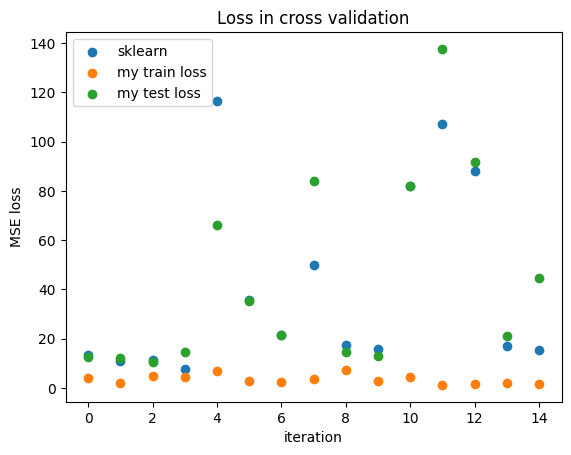

In [172]:
from sklearn.model_selection import KFold
N = 15
skl_loss_a = []
train_loss_a = []
test_loss_a = []

kf = KFold(n_splits=N)
for train, test in kf.split(np.arange(0, len(X_in))):
  x_train = X_in[train, :]
  y_train = y_in[train]
  x_test = X_in[test, :]
  y_test = y_in[test]

  regressor = DecisionTreeRegressor()
  regressor.fit(x_train, y_train)
  y_hat_skl = regressor.predict(x_test)
  skl_loss = np.mean(np.square(y_hat_skl - y_test))

  node = train_tree(x_train, y_train)

  y_hat_train = node.predict(x_train)
  train_loss = np.mean(np.square(y_hat_train - y_train))

  y_hat_test = node.predict(x_test)
  test_loss = np.mean(np.square(y_hat_test - y_test))

  skl_loss_a.append(skl_loss)
  train_loss_a.append(train_loss)
  test_loss_a.append(test_loss)
  print(f"train: {train_loss} test: {test_loss} abs: {np.sqrt(test_loss)} skl:{skl_loss}")

index = np.arange(N)
plt.scatter(x=index, y=skl_loss_a, label="sklearn")
plt.scatter(x=index, y=train_loss_a, label="my train loss")
plt.scatter(x=index, y=test_loss_a, label="my test loss")

  # yt = train[-1, :]
  # xtest = train[:-1, :]
  # ytest = train[-1, :]
plt.title("Loss in cross validation")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("MSE loss")
plt.show()